In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('./CRPSets/CRPSets.csv', header=None)

In [3]:
#df.shape

In [4]:
#df

In [5]:
# Dataset from the csv minus the last column which is the target
dataset = df.drop([64], axis=1)

# Target value which is the last column
target = df[64]

In [6]:
dataset = np.array(dataset)
dataset.shape

(12000, 64)

In [7]:
target = np.array(target)
target.shape

(12000,)

In [8]:
test_size = 0.166655 #for testing what train/test split ratio is necessary to reach 80% accuracy
#0.166655 = ~10,000 samples for training model (easiest)
#0.5      = ~6,000  samples for training model (medium)
#0.833345 = ~2,000  samples for training model (hard mode)

In [9]:
data_train, data_val, target_train, target_val = train_test_split(dataset, 
                                                                    target,
                                                                    test_size=test_size,
                                                                    shuffle=False,
                                                                    random_state=0)
data_train.shape, target_val.shape

((10000, 64), (2000,))

Model 1: Logisitc Regression

In [10]:
#parameters for grid search of hyperparameters of logistic regression 
parameters = {'penalty':('l2', None), # 'l1' is not compatible with lbfgs solver
              'tol':[0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
              'C':[0.01, 0.1, 1, 10] 
              }

In [11]:
#Logistic Regression Model
log_reg = LogisticRegression(dual=False, 
                             fit_intercept=True, 
                             intercept_scaling=1, 
                             class_weight=None, 
                             random_state=None, 
                             solver='lbfgs', 
                             max_iter=100, 
                             multi_class='auto', 
                             verbose=0
                             )

In [12]:
# Model 1 - Finding best hyperparameters using GridSearch
mod_1 = GridSearchCV(log_reg, parameters, verbose = 0)

In [13]:
# Fitting the model (Training)
mod_1.fit(data_train, target_train)

/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda

/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda

/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/Users/inky/anaconda

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ('l2', None),
                         'tol': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                 0.1]})

In [14]:
# Best Hyperparameters
mod_1.best_params_

{'C': 0.01, 'penalty': 'l2', 'tol': 1e-07}

In [15]:
# Predict for the test set
guess_val_1 = mod_1.predict(data_val)
guess_val_1

array([1, 0, 0, ..., 0, 0, 0])

In [16]:
# Accuracy Score
mod_1.score(data_val, target_val)

0.555

TRAINING SET
              precision    recall  f1-score   support

           0       0.57      0.79      0.66      5433
           1       0.55      0.30      0.39      4567

    accuracy                           0.57     10000
   macro avg       0.56      0.55      0.53     10000
weighted avg       0.56      0.57      0.54     10000



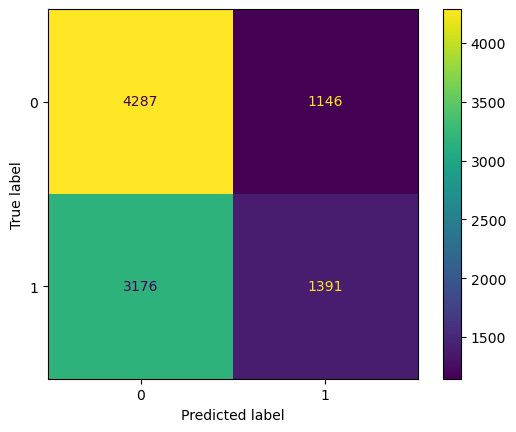



TEST SET
              precision    recall  f1-score   support

           0       0.56      0.79      0.65      1061
           1       0.55      0.29      0.38       939

    accuracy                           0.56      2000
   macro avg       0.55      0.54      0.52      2000
weighted avg       0.55      0.56      0.52      2000



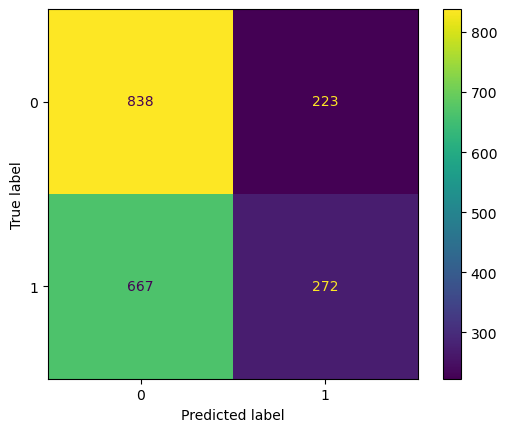

In [17]:
# Making predictions train/test
y_train = mod_1.predict(data_train)
y_val  = mod_1.predict(data_val)

# Displaying results
print('TRAINING SET')
print(classification_report(target_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_train, y_train))
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(target_val, y_val))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_val, y_val))
disp_test.plot();

In [18]:
df = pd.read_csv('./CRPSets/CRPSets.csv', header=None)
df.shape

(12000, 65)

In [19]:
# Dataset from the csv minus the last column which is the target
dataset = df.drop([64], axis=1)

# Target value which is the last column
target = df[64]

In [20]:
# Split into Training and Testing
data_train, data_test, target_train, target_test = train_test_split(dataset, 
                                                                    target,
                                                                    test_size=0.2,
                                                                    shuffle=True,
                                                                    random_state=0)
target_test.shape

(2400,)

In [21]:
# Model 2 - Logistic Regression
lr = Pipeline([('LR', SGDClassifier())])

In [22]:
# Setting up experiments: dictionary with the values for all hyperparameters
param_grid = {'LR__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
              'LR__alpha': [0, 0.001, 0.0001, 0.01, 0.05, 0.5]}

# Object to will carry experiments: must include performance measure and CV strategy (by default it uses k-fold CV)
grid_search = GridSearchCV(lr,
                           param_grid=param_grid,
                           cv=KFold(96,shuffle=True,random_state=50),
                           scoring='accuracy',
                           refit = True)

# Find the best parameters using the training data
grid_search.fit(data_train, target_train)

# Best Hyperparameter values 
print('Best hyperparameter values:', grid_search.best_params_)

# Best model
lr_best = grid_search.best_estimator_

Best hyperparameter values: {'LR__alpha': 0.001, 'LR__learning_rate': 'optimal'}


/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1824 fits failed out of a total of 2304.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1728 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/Users/inky/anaconda3/envs/eel5840/lib/python3.8/site-packages/sklearn/linear_model/_

TRAINING SET
              precision    recall  f1-score   support

           0       0.60      0.54      0.57      5193
           1       0.51      0.56      0.54      4407

    accuracy                           0.55      9600
   macro avg       0.55      0.55      0.55      9600
weighted avg       0.56      0.55      0.55      9600



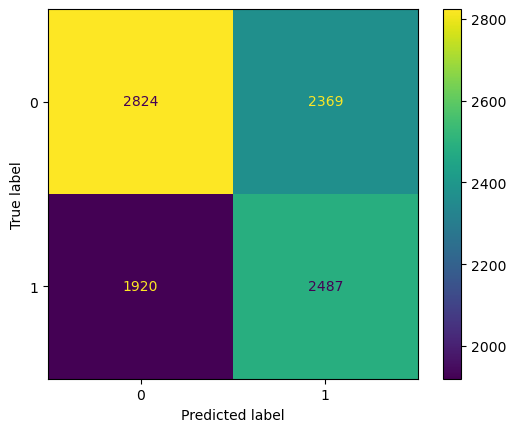



TEST SET
              precision    recall  f1-score   support

           0       0.59      0.57      0.58      1301
           1       0.51      0.53      0.52      1099

    accuracy                           0.55      2400
   macro avg       0.55      0.55      0.55      2400
weighted avg       0.56      0.55      0.55      2400



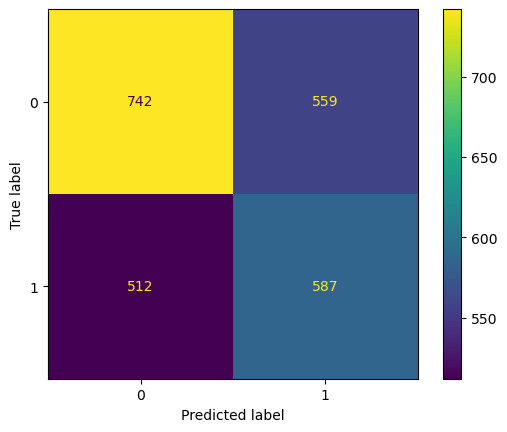

In [23]:
# Making predictions train/test
y_train = lr_best.predict(data_train)
y_test  = lr_best.predict(data_test)

# Displaying results
print('TRAINING SET')
print(classification_report(target_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_train, y_train), 
                                           )
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(target_test, y_test))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_test, y_test), 
                                           )
disp_test.plot();

# Model 2: Support Vector Machine (SVM)

In [24]:
# Setting up experiments: dictionary with the values for all hyperparameters
param_grid = {'C':[0.01, 0.1, 1, 10],
              'tol':[0.0000001, 0.000001, 0.00001, 0.0001, 0.001, 0.01, 0.1],
              }


In [25]:
# Model 2 - Support Vector Machine(SVM)
SVM = SVC(kernel= 'rbf',
          gamma='auto',  
          shrinking=True, 
          probability=True,  
          cache_size=200, 
          class_weight=None, 
          verbose=1, 
          max_iter=-1, 
          decision_function_shape='ovr', 
          break_ties=False, 
          random_state=None)

In [26]:
# Finding best hyperparameters using GridSearch
mod_2 = make_pipeline(StandardScaler(), SVM)
#mod_2 = GridSearchCV(clf, param_grid, verbose = 0)

In [27]:
# Fitting the model (Training)
mod_2.fit(data_train, target_train)

[LibSVM]......*.*
optimization finished, #iter = 7832
obj = -5134.173641, rho = 0.242602
nSV = 7362, nBSV = 5701
Total nSV = 7362
......*..*
optimization finished, #iter = 8017
obj = -5125.823749, rho = 0.247164
nSV = 7339, nBSV = 5611
Total nSV = 7339
......*.*
optimization finished, #iter = 7906
obj = -5094.706898, rho = 0.236121
nSV = 7324, nBSV = 5607
Total nSV = 7324
......*..*
optimization finished, #iter = 8060
obj = -5102.129249, rho = 0.237186
nSV = 7323, nBSV = 5594
Total nSV = 7323
......*.*
optimization finished, #iter = 7967
obj = -5095.409742, rho = 0.235884
nSV = 7328, nBSV = 5615
Total nSV = 7328
.......*...*
optimization finished, #iter = 10165
obj = -6419.684417, rho = -0.239132
nSV = 9115, nBSV = 7001
Total nSV = 9115


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto', probability=True, verbose=1))])

In [28]:
# Finding best hyperparameters
#mod_2.best_params_

In [29]:
# Predicting values for the test set
guess_val_2 = mod_2.predict(data_val)
guess_val_2

array([1, 0, 0, ..., 0, 1, 0])

In [30]:
# Accuracy score
mod_2.score(data_val, target_val)



0.778

TRAINING SET
              precision    recall  f1-score   support

           0       0.79      0.92      0.85      5193
           1       0.89      0.72      0.79      4407

    accuracy                           0.83      9600
   macro avg       0.84      0.82      0.82      9600
weighted avg       0.84      0.83      0.83      9600



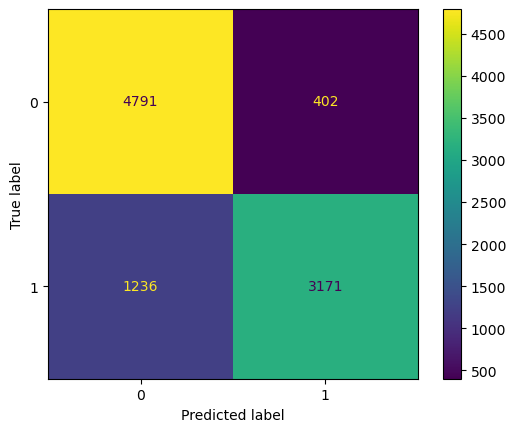



TEST SET
              precision    recall  f1-score   support

           0       0.74      0.89      0.81      1061
           1       0.84      0.65      0.73       939

    accuracy                           0.78      2000
   macro avg       0.79      0.77      0.77      2000
weighted avg       0.79      0.78      0.77      2000



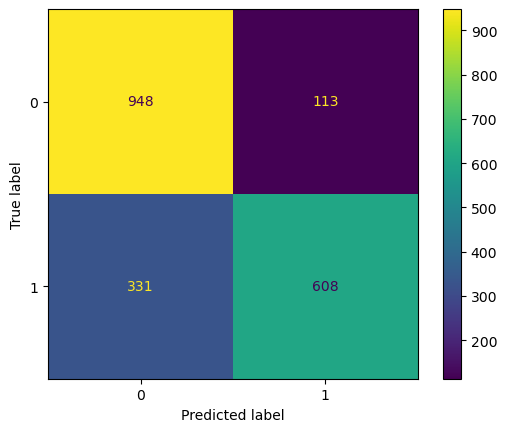

In [31]:
# Making predictions train/test
y_train = mod_2.predict(data_train)
y_val  = mod_2.predict(data_val)

# Displaying results
print('TRAINING SET')
print(classification_report(target_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_train, y_train))
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(target_val, y_val))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_val, y_val))
disp_test.plot();

In [32]:
df = pd.read_csv('./CRPSets/CRPSets.csv', header=None)
df.shape

(12000, 65)

In [33]:
# Dataset from the csv minus the last column which is the target
dataset = df.drop([64], axis=1)

# Target value which is the last column
target = df[64]

In [34]:
# Split into Training and Testing
data_train, data_test, target_train, target_test = train_test_split(dataset, 
                                                                    target,
                                                                    test_size=0.2,
                                                                    shuffle=True,
                                                                    random_state=0)
target_test.shape

(2400,)

In [35]:
# Model 2 - SVM
svm = Pipeline([('scaler', MinMaxScaler()),
                ('SVM', SVC())])

In [ ]:
# Setting up experiments: dictionary with the values for all hyperparameters
param_grid = {'SVM__kernel': ['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'],
              'SVM__C': [1,10]}#,1E3,1E4,1E5,1E6,1E7,1E8,1E9]}

# Object to will carry experiments: must include performance measure and CV strategy (by default it uses k-fold CV)
grid_search = GridSearchCV(svm,
                           param_grid=param_grid,
                           cv=KFold(10,shuffle=True,random_state=0),
                           scoring='accuracy',
                           refit = True)

# Find the best parameters using the training data
grid_search.fit(data_train, target_train)

# Best Hyperparameter values 
print('Best hyperparameter values:', grid_search.best_params_)

# Best model
svmrbf_best = grid_search.best_estimator_

In [ ]:
# Making predictions train/test
y_train = svmrbf_best.predict(data_train)
y_test  = svmrbf_best.predict(data_test)

# Displaying results
print('TRAINING SET')
print(classification_report(target_train, y_train))
disp_train=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_train, y_train))
disp_train.plot(); plt.show()
print('\n\nTEST SET')
print(classification_report(target_test, y_test))
disp_test=ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(target_test, y_test))
disp_test.plot();